In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from sklearn import preprocessing
from tqdm import tqdm 

In [29]:
from mnist import MNIST

mndata = MNIST('samples')

In [30]:
# get training data
X_train, y_train = mndata.load_training()

In [31]:
# converting into numpy array data
X_train = np.array(X_train)
y_train = np.array(y_train)

In [32]:
# slicing the dataset to required dimension
X_train = X_train[:15000]
y_train = y_train[:15000]

In [33]:
# get testing data
X_test, y_test = mndata.load_testing()

In [34]:
X_test = np.array(X_test)
y_test = np.array(y_test)

In [35]:
# slicing the dataset to required dimension
X_test = X_test[:2500]
y_test = y_test[:2500]

In [36]:
print('X_train: ' + str(X_train.shape))
print('Y_train: ' + str(y_train.shape))
print('X_test:  '  + str(X_test.shape))
print('Y_test:  '  + str(y_test.shape))

X_train: (15000, 784)
Y_train: (15000,)
X_test:  (2500, 784)
Y_test:  (2500,)


The image label of index 0 is 7.


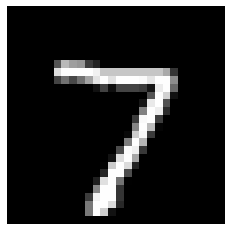

**************


In [37]:
#X_test[0]
digit = X_test[0]
print('The image label of index %d is %d.' %(0, y_test[0]))
digit_image = digit.reshape(28, 28)
plt.imshow(digit_image, cmap='gray')
plt.axis("off")
plt.show()
print("**************")

The image label of index 10177 is 4.


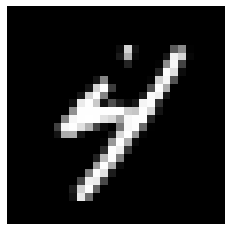

**************
The image label of index 12731 is 4.


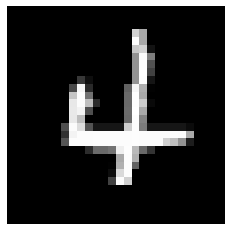

**************
The image label of index 9596 is 6.


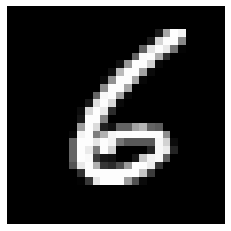

**************
The image label of index 11580 is 9.


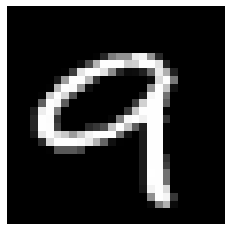

**************
The image label of index 14968 is 8.


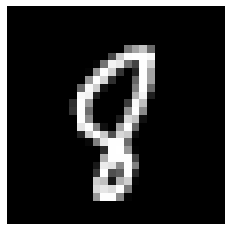

**************
The image label of index 12836 is 3.


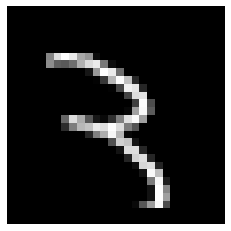

**************
The image label of index 3671 is 6.


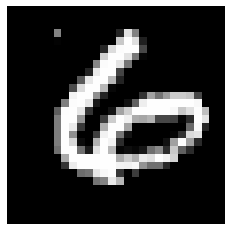

**************
The image label of index 4775 is 1.


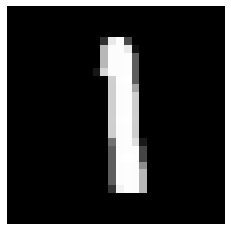

**************
The image label of index 4125 is 4.


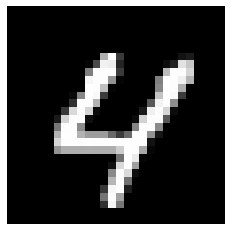

**************
The image label of index 1165 is 2.


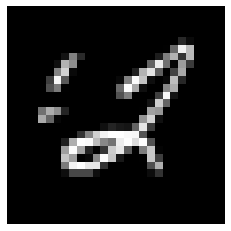

**************


In [38]:
#printing 10 random digits from training 
temp1 = []
for i in range(10):
    n = random.randint(0,X_train.shape[0])
    temp1.append(n)
    digit = X_train[n]
    print('The image label of index %d is %d.' %(n, y_train[n]))
    digit_image = digit.reshape(28, 28)
    plt.imshow(digit_image, cmap='gray')
    plt.axis("off")
    plt.show()
    print("**************")

The image label of index 1057 is 4.


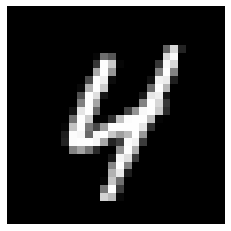

**************
The image label of index 1880 is 6.


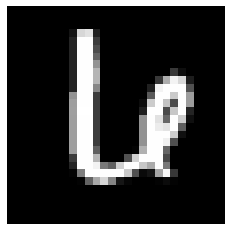

**************
The image label of index 1122 is 7.


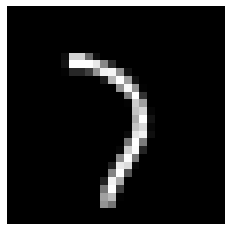

**************
The image label of index 1076 is 2.


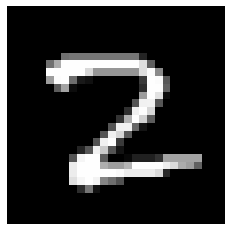

**************
The image label of index 2140 is 6.


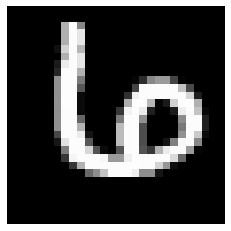

**************
The image label of index 1489 is 3.


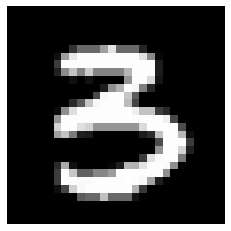

**************
The image label of index 364 is 5.


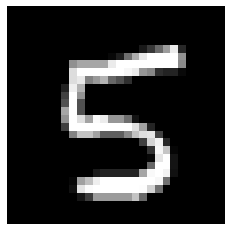

**************
The image label of index 2261 is 1.


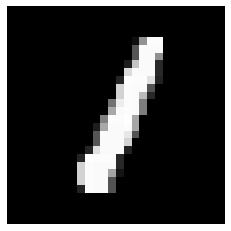

**************
The image label of index 165 is 5.


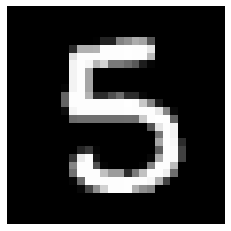

**************
The image label of index 1310 is 3.


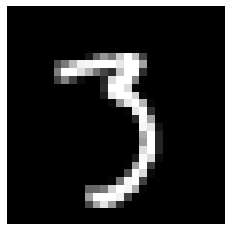

**************


In [39]:
#printing 10 random digits from testing  
temp2 = []
for i in range(10):
    n = random.randint(0,X_test.shape[0])
    temp2.append(n)
    digit = X_test[n]
    print('The image label of index %d is %d.' %(n, y_test[n]))
    digit_image = digit.reshape(28, 28)
    plt.imshow(digit_image, cmap='gray')
    plt.axis("off")
    plt.show()
    print("**************")

In [40]:
# normalizing the X_train

# feature normalisation for training and testing
X_train_1 = preprocessing.normalize(X_train, norm='l2', axis=0)
X_test_1 = preprocessing.normalize(X_test, norm='l2', axis=0)

In [41]:
# normalizing the X_train

# column normalisation for training and testing
X_train_2 = preprocessing.normalize(X_train, norm='l2', axis=1)
X_test_2 = preprocessing.normalize(X_test, norm='l2', axis=1)

The image label of index 10177 is 4.


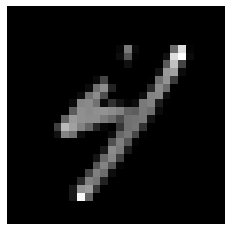

**************
The image label of index 12731 is 4.


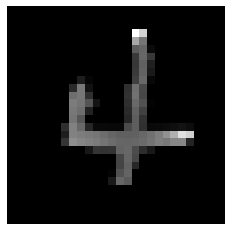

**************
The image label of index 9596 is 6.


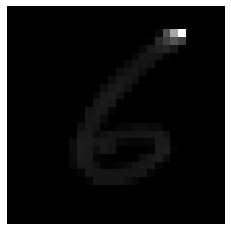

**************
The image label of index 11580 is 9.


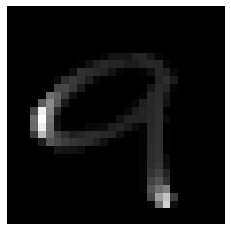

**************
The image label of index 14968 is 8.


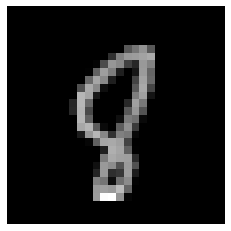

**************
The image label of index 12836 is 3.


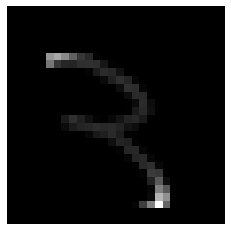

**************
The image label of index 3671 is 6.


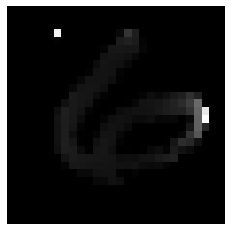

**************
The image label of index 4775 is 1.


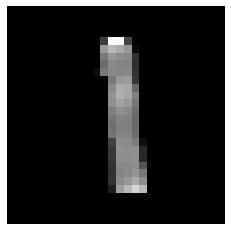

**************
The image label of index 4125 is 4.


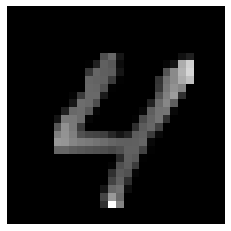

**************
The image label of index 1165 is 2.


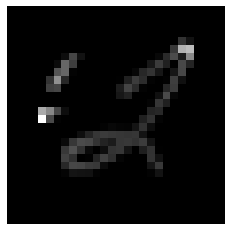

**************


In [72]:
#comparing the same training image after normalization
for i in temp1:
    digit = X_train_1[i]
    print('The image label of index %d is %d.' %(i, y_train[i]))
    digit_image = digit.reshape(28, 28)
    plt.imshow(digit_image, cmap='gray')
    plt.axis("off")
    plt.show()
    print("**************")

In [52]:
def dist(xtrain, xtest):
    m, dimensions= xtrain.shape
    n, dimensions= xtest.shape
    size= (m, n)
    distance = np.zeros(size)
    for i in tqdm(range (m)):
        for j in range(n):
            diff = np.subtract(xtrain[i], xtest[j])
            diff = diff ** 2
            diff = diff.sum(axis=0)
            distance[i][j]= np.sqrt(diff)

    return distance

In [53]:
M = dist(X_train_2, X_test_2)

100%|████████████████████████████████████████████████████████████████████████████| 15000/15000 [07:22<00:00, 33.93it/s]


In [54]:
def retrieve_k(i, M, k):

    lst = M[:,i] 
    indiceList = np.argsort(lst)[:k]    
        
    return indiceList

In [45]:
retrieve_k(0, M, 10)

array([14563, 14770, 14505,  9444,  9724,  1673,  4130,  6475,  3298,
        6525], dtype=int64)

In [55]:
M.shape

(15000, 2500)

In [64]:
def precision_k(y, ytrain, I):
    sum_ = 0
    for i in I:
        if ytrain[i] == y:
            sum_+=1
    return sum_/len(I)

In [65]:
def avg_precision_k(Xtrain, ytrain, Xtest, ytest, k, m):
    s = 0
    for i in tqdm(range(len(ytest))):
        #I = []
        I = retrieve_k(i, m, k)
        s += precision_k(ytest[i], ytrain, I)
    return s/len(Xtest)

In [66]:
"""For each k 2 {1, 2, 5, 10, 20, 50, 100, 200, 500, 1000}, calculate the average precision at k and the
running time of retrieval. Plot the average precision curve against k and summarize your findings."""
k = [1, 2, 5, 10, 20, 50, 100, 200, 500, 1000]
temp = []
for i in k:
    temp.append(avg_precision_k(X_train_2, y_train, X_test_2, y_test, i, M))

100%|█████████████████████████████████████████████████████████████████████████████| 2500/2500 [00:05<00:00, 446.17it/s]


In [67]:
# Avg precision values
temp

[0.9436,
 0.936,
 0.917999999999999,
 0.9000800000000039,
 0.8749000000000032,
 0.8256960000000061,
 0.7765240000000031,
 0.7123819999999985,
 0.6004760000000007,
 0.48379360000000016]

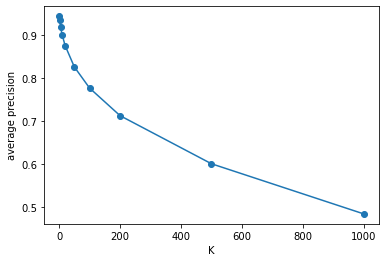

In [68]:
# plotting the k vs avg_precision
plt.scatter(k, temp)
plt.plot(k, temp)
plt.xlabel("K")
plt.ylabel("average precision")
plt.show()